In [1]:
from scripts.ClusterTS_MDS import ClusterVTECDataMDS
from numpy import loadtxt, float64

In [2]:
PTEX_dissim = loadtxt("./data/PTEX_DTW_matrix.dat", dtype= float64, delimiter = ",")

In [3]:
list_dimensions = tuple(range(1, 7))
list_clusters = tuple(range(2, 11))
list_clust_methods = ["K-Means", "Gaussian"]

TEC_ClusterSeries = ClusterVTECDataMDS(dissimilarity = PTEX_dissim)

In [4]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_method):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))

    for cluster_method, metrics_results in metrics_by_method.items():
        num_clusters, metrics = zip(*metrics_results)
        SH, CH, DB = zip(*metrics)

        Subplot[0].plot(num_clusters, SH, "-o", label = cluster_method)
        Subplot[1].plot(num_clusters, CH, "-o", label = cluster_method)
        Subplot[2].plot(num_clusters, DB, "-o", label = cluster_method)

    Subplot[0].legend()
    Subplot[1].legend()
    Subplot[2].legend()

    Subplot[2].set_xlabel("# of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
def VisualizeClusterMetrics(metrics_by_method):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))

    for cluster_method, metrics_results in metrics_by_method.items():
        num_clusters, metrics = zip(*metrics_results)
        SH, CH, DB = zip(*metrics)

        Subplot[0].plot(num_clusters, SH, "-o", label = cluster_method)
        Subplot[1].plot(num_clusters, CH, "-o", label = cluster_method)
        Subplot[2].plot(num_clusters, DB, "-o", label = cluster_method)

    Subplot[0].legend()
    Subplot[1].legend()
    Subplot[2].legend()

    Subplot[2].set_xlabel("# of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [6]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def GetClusteringMetrics(Xc, num_clusters, cluster_method = "K-Means"):
    if cluster_method == "K-Means":
        KMeans_Cluster_TS = KMeans(n_clusters = num_clusters, init = "k-means++")
        Labels = KMeans_Cluster_TS.fit_predict(Xc)
        
    elif cluster_method == "Gaussian":
        GaussianMix_Cluster_TS = GaussianMixture(n_components = num_clusters, covariance_type = "full")
        Labels = GaussianMix_Cluster_TS.fit_predict(Xc)

    SH_score_Xc = silhouette_score(Xc, Labels)
    CH_score_Xc = calinski_harabasz_score(Xc, Labels)
    DB_score_Xc = davies_bouldin_score(Xc, Labels)

    return (SH_score_Xc, CH_score_Xc, DB_score_Xc)


### SMACOF-DTW

SMACOF-Dissim with 1 components has a stress value of 0.507648


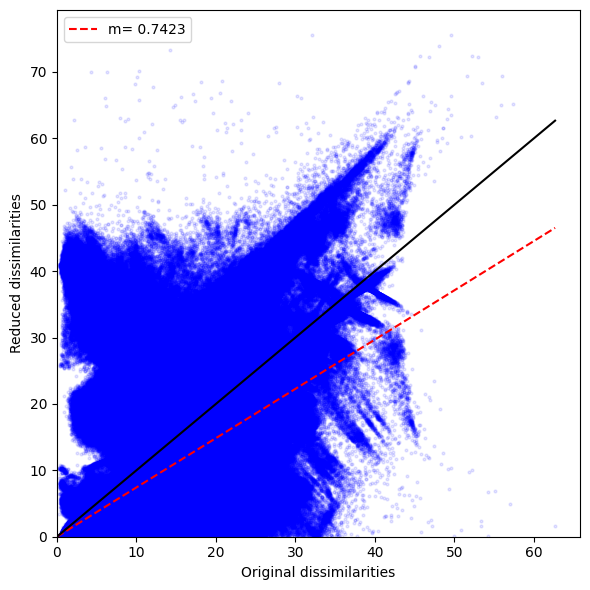

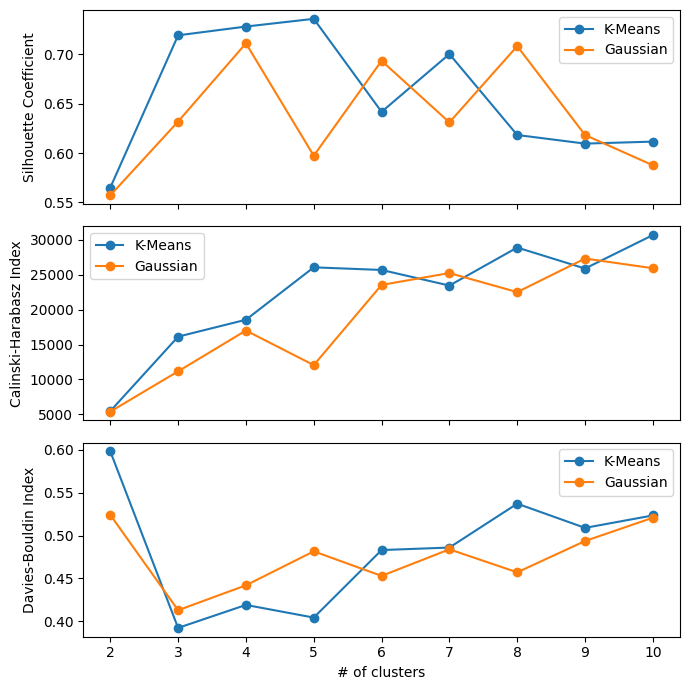

SMACOF-Dissim with 2 components has a stress value of 0.122659


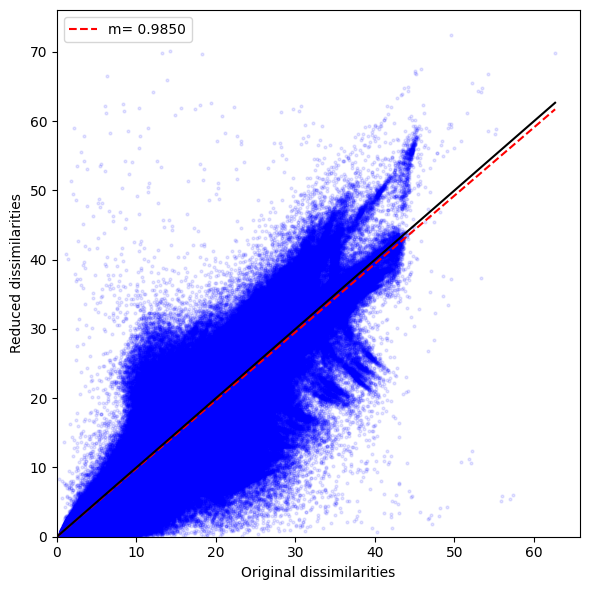

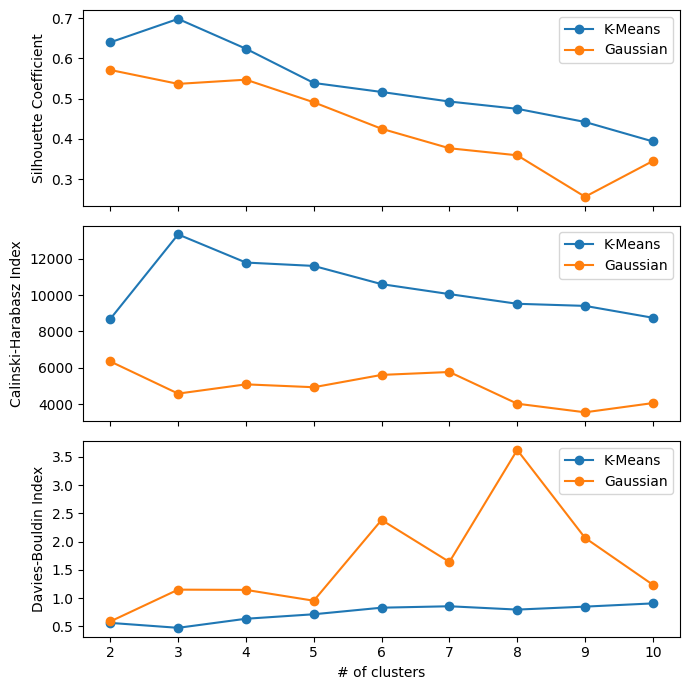

SMACOF-Dissim with 3 components has a stress value of 0.071980


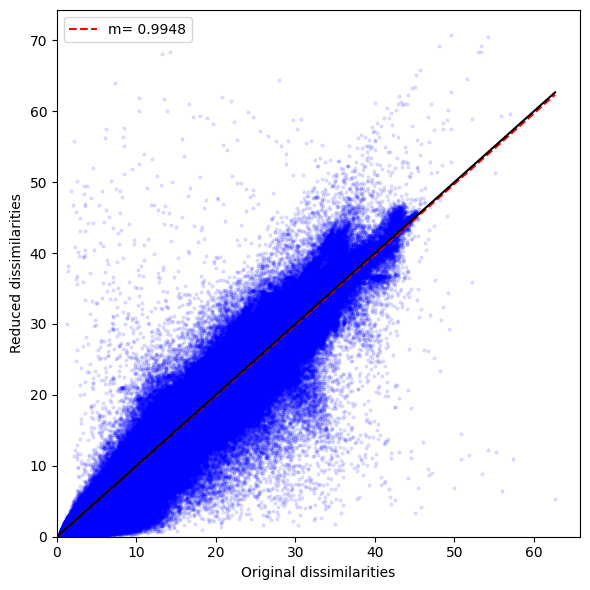

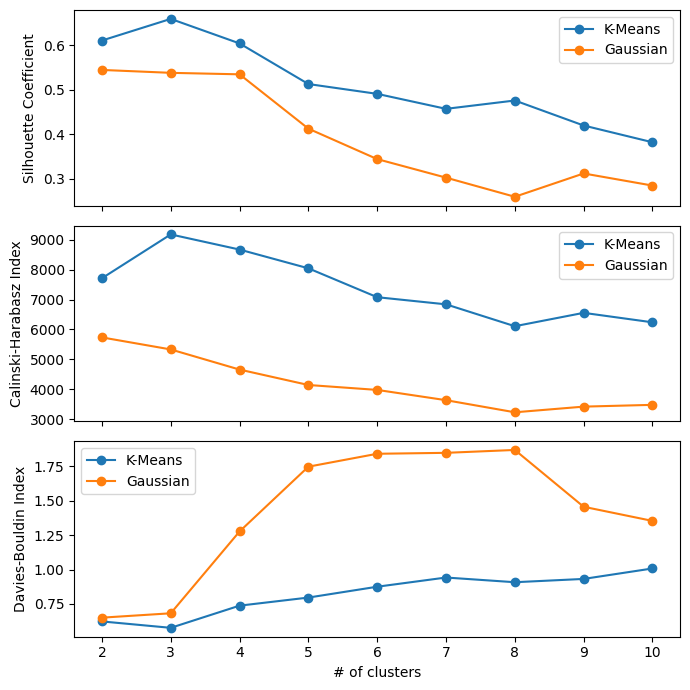

SMACOF-Dissim with 4 components has a stress value of 0.055558


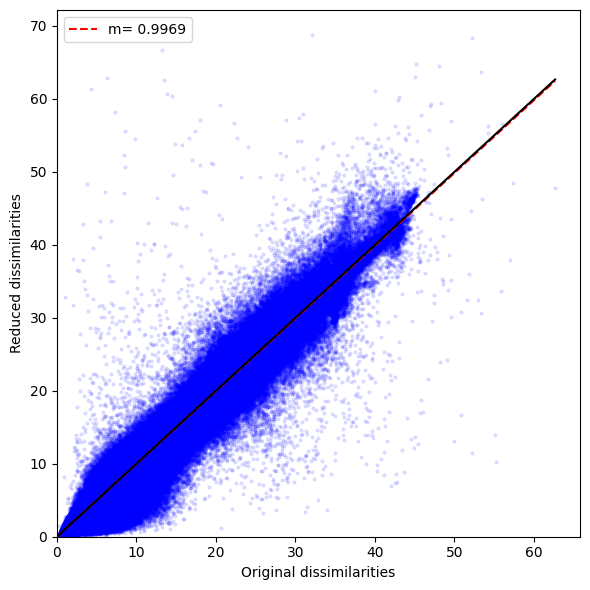

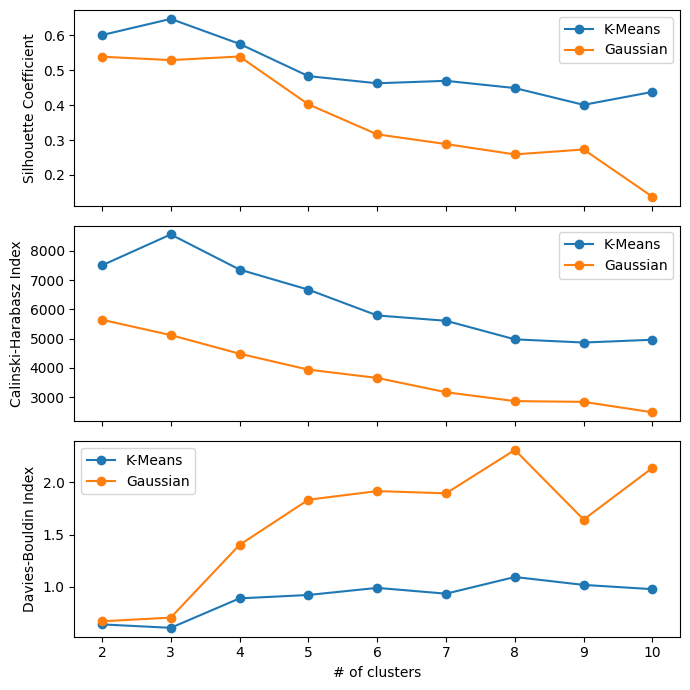

SMACOF-Dissim with 5 components has a stress value of 0.048492


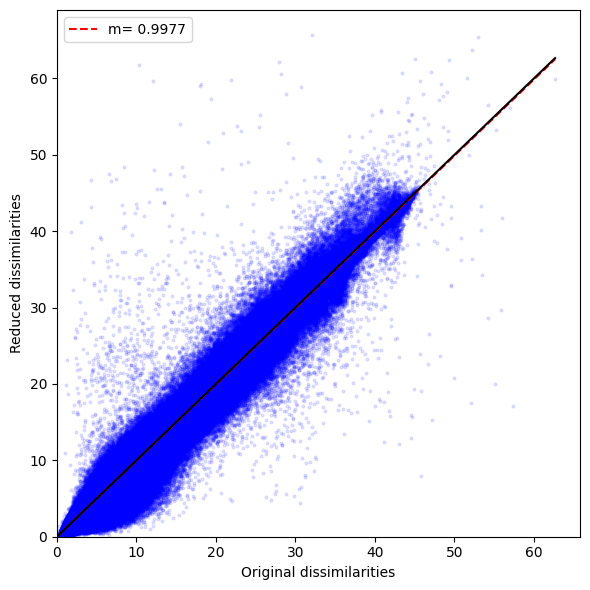

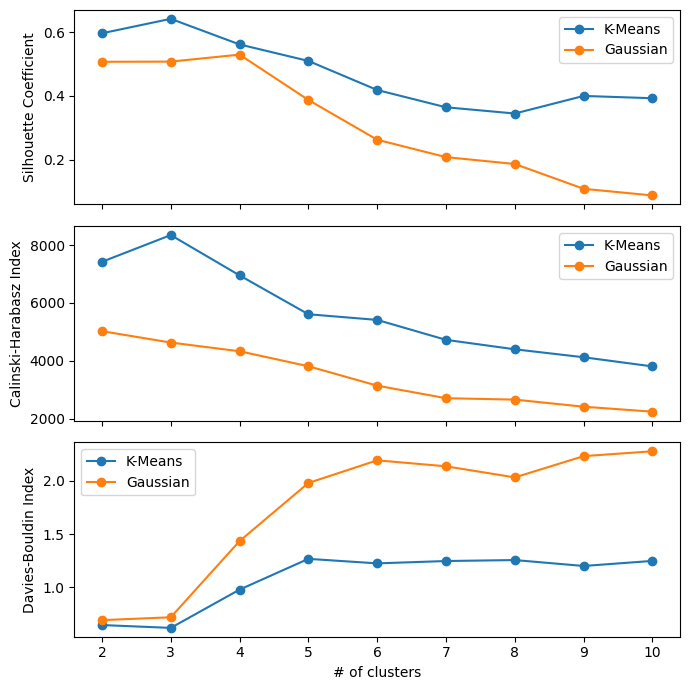

SMACOF-Dissim with 6 components has a stress value of 0.044500


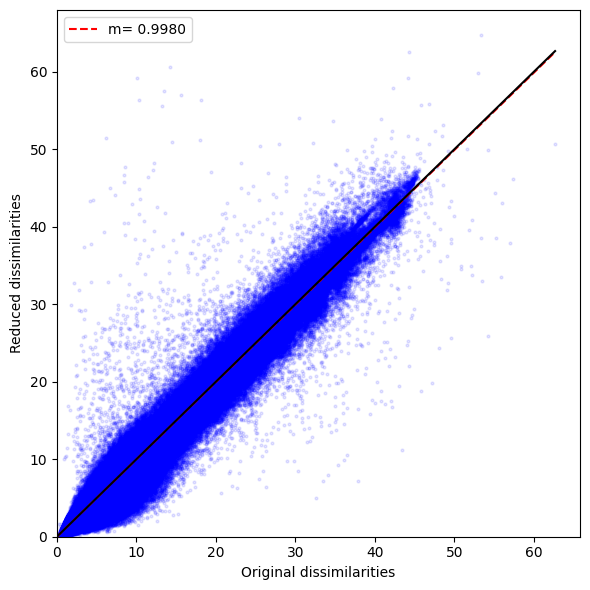

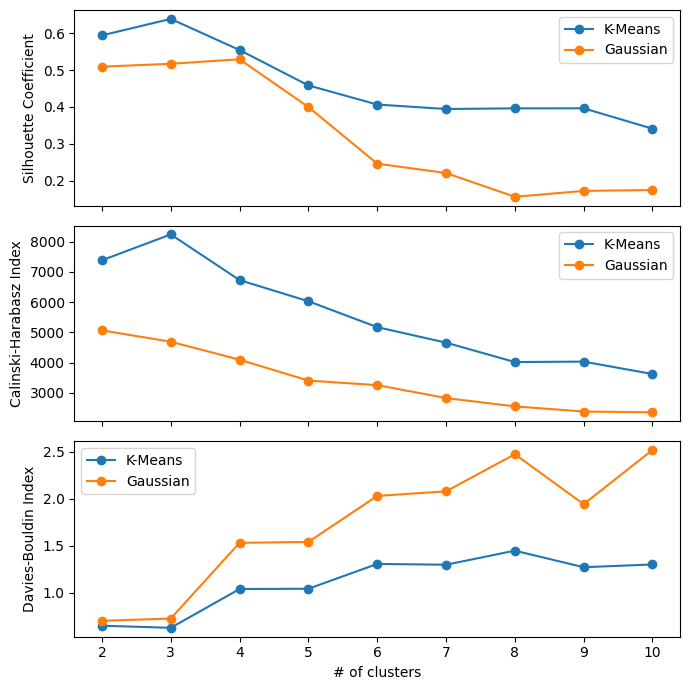

In [7]:
stress_array_SMACOF_DTW = []

for num_dim in list_dimensions:
    stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = "SMACOF-Dissim")
    stress_array_SMACOF_DTW.append(stress)

    metrics_by_method = dict()
    for type_cluster in list_clust_methods:
        metrics = []
        for num_cluster in list_clusters:
            cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, type_cluster)

            metrics.append((num_cluster, cluster_metrics))
        metrics_by_method[type_cluster] = metrics

    VisualizeClusterMetrics(metrics_by_method)

### SMACOF DTW con solución clásica inicial

[[0.         8.0130647  9.41521022 ... 2.32588724 3.31725447 4.159708  ]
 [8.0130647  0.         9.09082031 ... 6.42787419 7.79348939 6.74184085]
 [9.41521022 9.09082031 0.         ... 8.68843867 7.25110736 8.1336659 ]
 ...
 [2.32588724 6.42787419 8.68843867 ... 0.         3.61296279 4.14374911]
 [3.31725447 7.79348939 7.25110736 ... 3.61296279 0.         4.2400717 ]
 [4.159708   6.74184085 8.1336659  ... 4.14374911 4.2400717  0.        ]]
SMACOF-Dissim-Classic with 1 components has a stress value of 0.241728


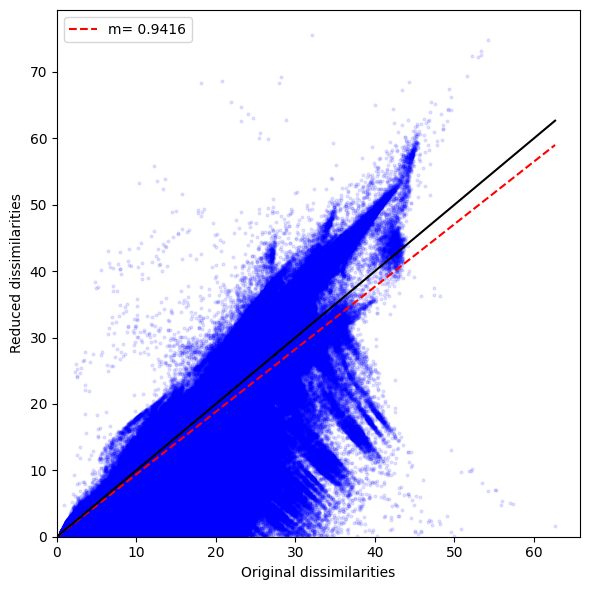

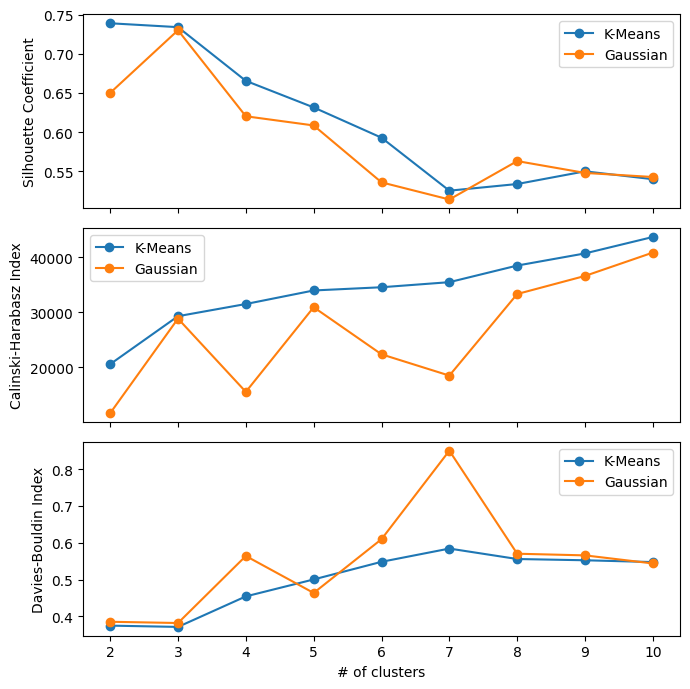

[[0.         8.0130647  9.41521022 ... 2.32588724 3.31725447 4.159708  ]
 [8.0130647  0.         9.09082031 ... 6.42787419 7.79348939 6.74184085]
 [9.41521022 9.09082031 0.         ... 8.68843867 7.25110736 8.1336659 ]
 ...
 [2.32588724 6.42787419 8.68843867 ... 0.         3.61296279 4.14374911]
 [3.31725447 7.79348939 7.25110736 ... 3.61296279 0.         4.2400717 ]
 [4.159708   6.74184085 8.1336659  ... 4.14374911 4.2400717  0.        ]]
SMACOF-Dissim-Classic with 2 components has a stress value of 0.114077


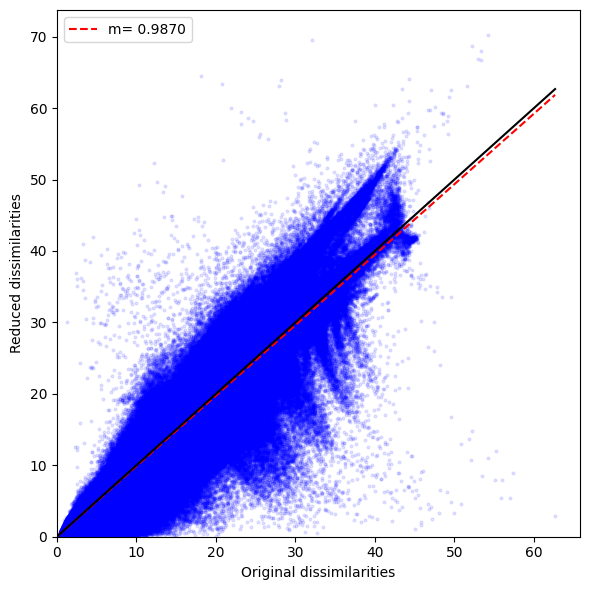

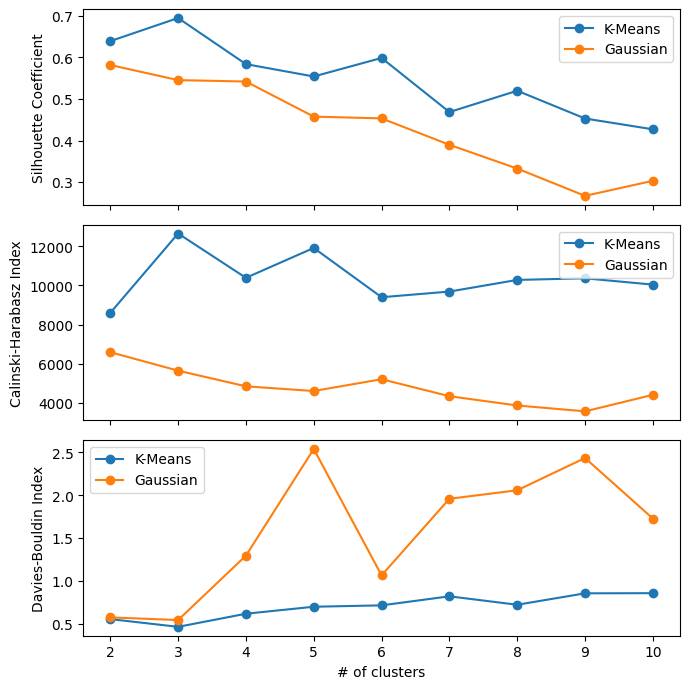

[[0.         8.0130647  9.41521022 ... 2.32588724 3.31725447 4.159708  ]
 [8.0130647  0.         9.09082031 ... 6.42787419 7.79348939 6.74184085]
 [9.41521022 9.09082031 0.         ... 8.68843867 7.25110736 8.1336659 ]
 ...
 [2.32588724 6.42787419 8.68843867 ... 0.         3.61296279 4.14374911]
 [3.31725447 7.79348939 7.25110736 ... 3.61296279 0.         4.2400717 ]
 [4.159708   6.74184085 8.1336659  ... 4.14374911 4.2400717  0.        ]]
SMACOF-Dissim-Classic with 3 components has a stress value of 0.067332


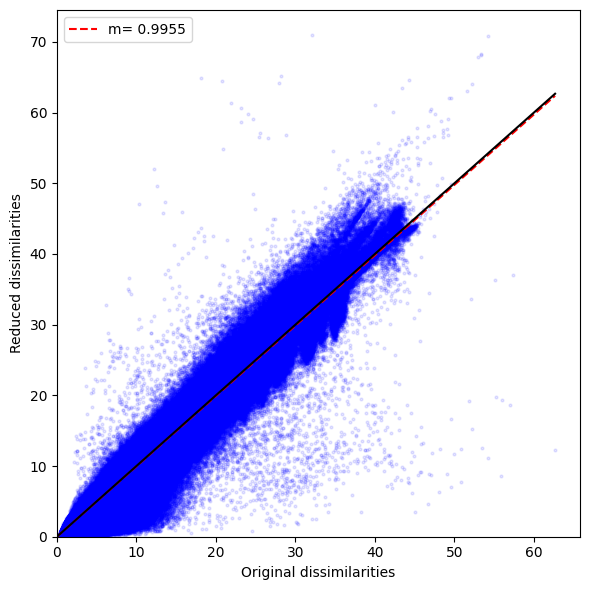

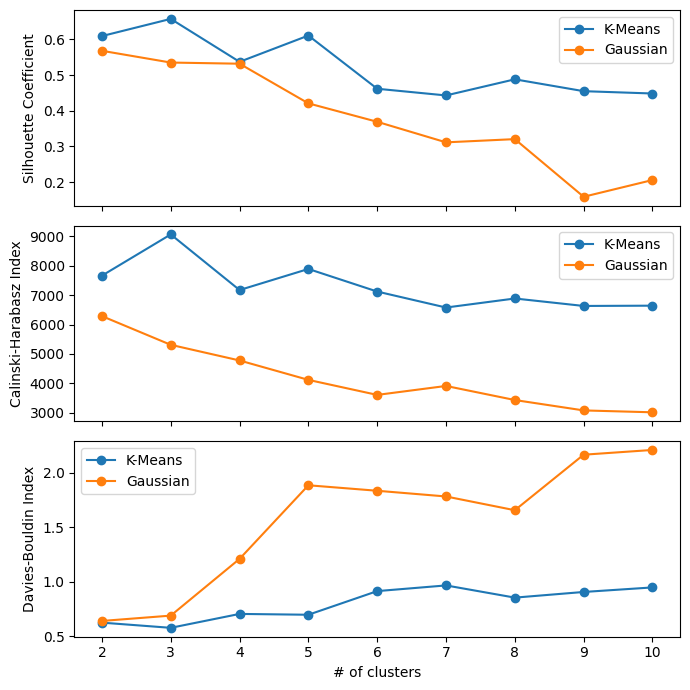

[[0.         8.0130647  9.41521022 ... 2.32588724 3.31725447 4.159708  ]
 [8.0130647  0.         9.09082031 ... 6.42787419 7.79348939 6.74184085]
 [9.41521022 9.09082031 0.         ... 8.68843867 7.25110736 8.1336659 ]
 ...
 [2.32588724 6.42787419 8.68843867 ... 0.         3.61296279 4.14374911]
 [3.31725447 7.79348939 7.25110736 ... 3.61296279 0.         4.2400717 ]
 [4.159708   6.74184085 8.1336659  ... 4.14374911 4.2400717  0.        ]]
SMACOF-Dissim-Classic with 4 components has a stress value of 0.051797


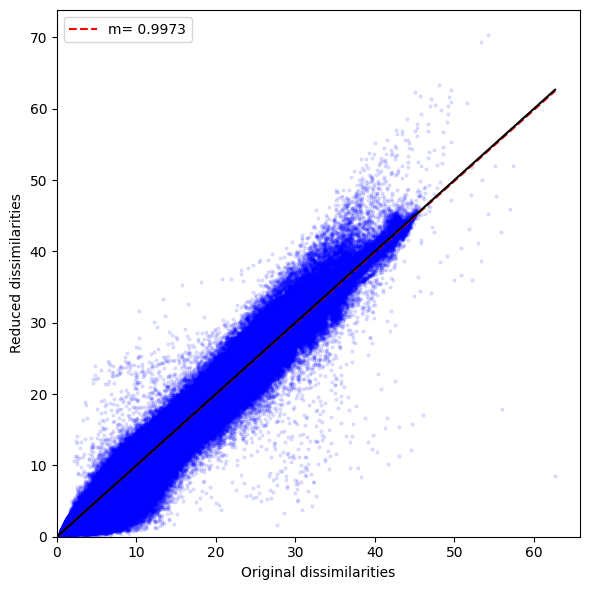

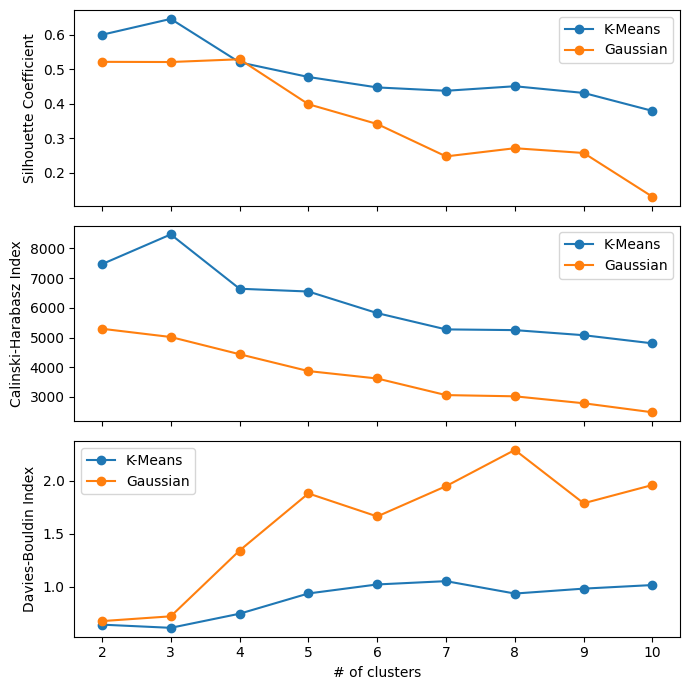

[[0.         8.0130647  9.41521022 ... 2.32588724 3.31725447 4.159708  ]
 [8.0130647  0.         9.09082031 ... 6.42787419 7.79348939 6.74184085]
 [9.41521022 9.09082031 0.         ... 8.68843867 7.25110736 8.1336659 ]
 ...
 [2.32588724 6.42787419 8.68843867 ... 0.         3.61296279 4.14374911]
 [3.31725447 7.79348939 7.25110736 ... 3.61296279 0.         4.2400717 ]
 [4.159708   6.74184085 8.1336659  ... 4.14374911 4.2400717  0.        ]]
SMACOF-Dissim-Classic with 5 components has a stress value of 0.043998


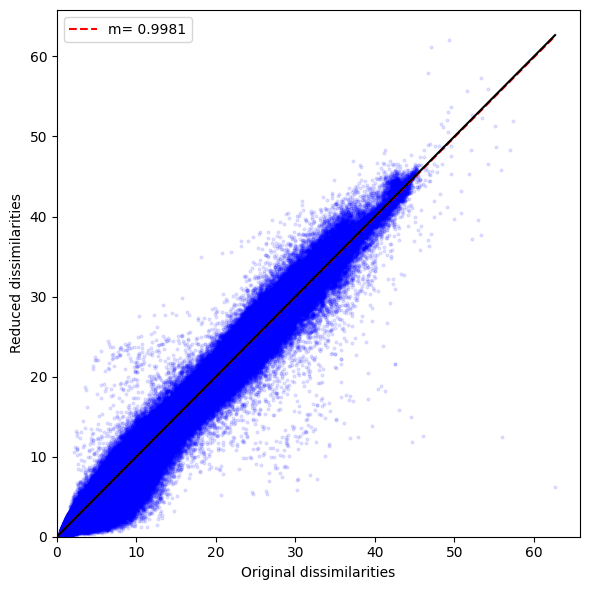

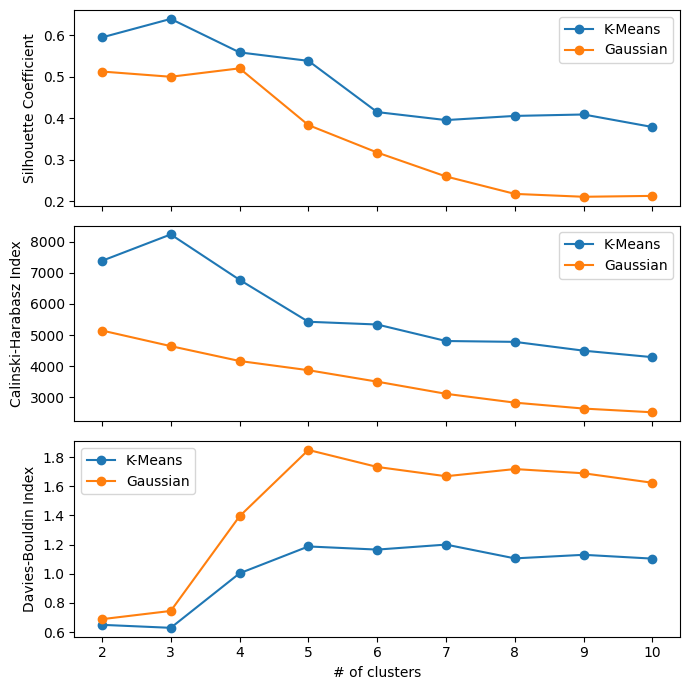

[[0.         8.0130647  9.41521022 ... 2.32588724 3.31725447 4.159708  ]
 [8.0130647  0.         9.09082031 ... 6.42787419 7.79348939 6.74184085]
 [9.41521022 9.09082031 0.         ... 8.68843867 7.25110736 8.1336659 ]
 ...
 [2.32588724 6.42787419 8.68843867 ... 0.         3.61296279 4.14374911]
 [3.31725447 7.79348939 7.25110736 ... 3.61296279 0.         4.2400717 ]
 [4.159708   6.74184085 8.1336659  ... 4.14374911 4.2400717  0.        ]]
SMACOF-Dissim-Classic with 6 components has a stress value of 0.039783


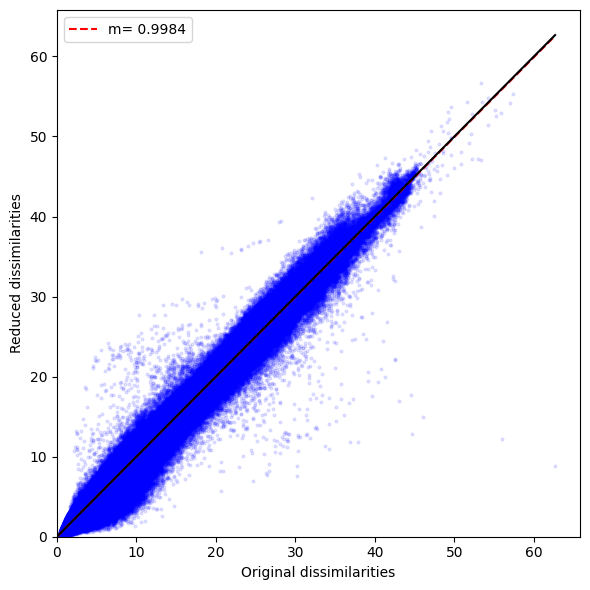

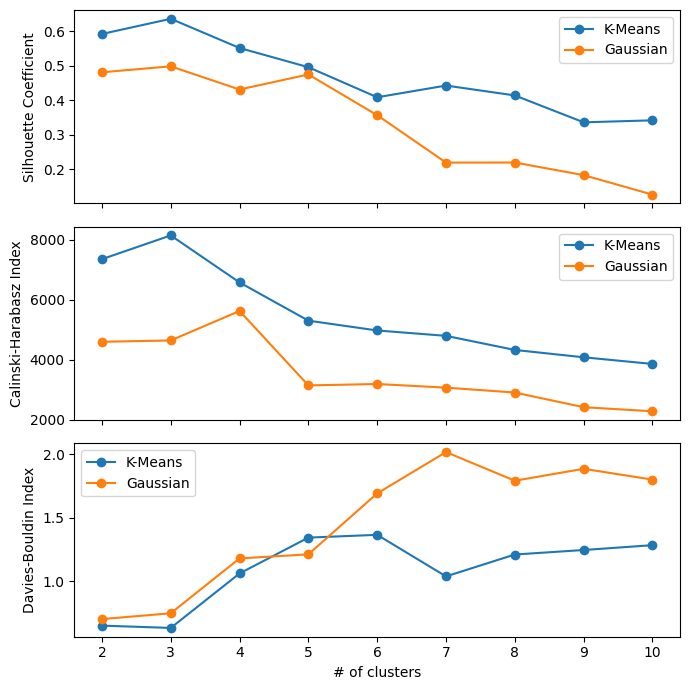

In [8]:
stress_array_SMACOF_DTW_Classic = []

for num_dim in list_dimensions:
    stress = TEC_ClusterSeries.ComputeMDS(num_comps_mds = num_dim, method = "SMACOF-Dissim-Classic")
    stress_array_SMACOF_DTW_Classic.append(stress)

    metrics_by_method = dict()
    for type_cluster in list_clust_methods:
        metrics = []
        for num_cluster in list_clusters:
            cluster_metrics = GetClusteringMetrics(TEC_ClusterSeries.Xc_TS, num_cluster, type_cluster)

            metrics.append((num_cluster, cluster_metrics))
        metrics_by_method[type_cluster] = metrics

    VisualizeClusterMetrics(metrics_by_method)

## Curvas Stress-1

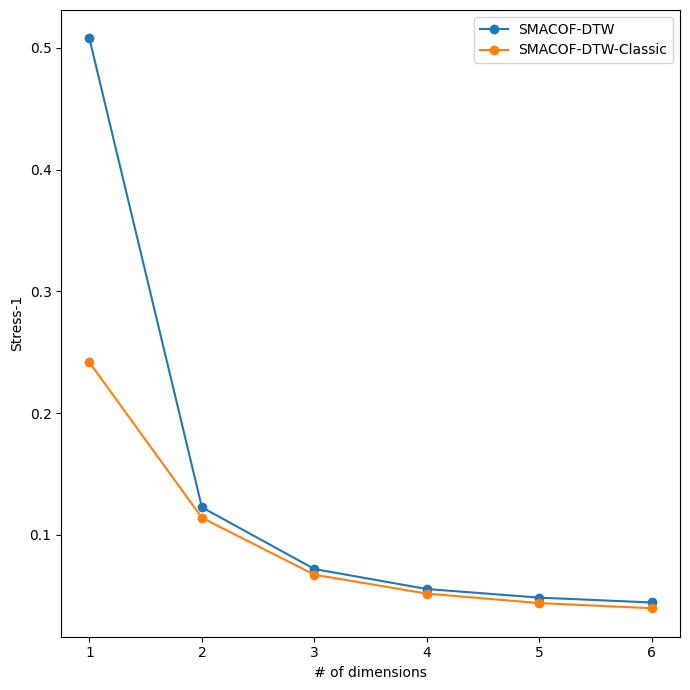

In [9]:
Figure, Subplot = subplots(1, 1, figsize = (7, 7))

Subplot.plot(list_dimensions, stress_array_SMACOF_DTW, "-o", label =  "SMACOF-DTW")
Subplot.plot(list_dimensions, stress_array_SMACOF_DTW_Classic, "-o", label =  "SMACOF-DTW-Classic")
Subplot.set_xlabel("# of dimensions")
Subplot.set_ylabel("Stress-1")
Subplot.legend()

Figure.tight_layout()

show()